In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

plt.rc('font', family='AppleGothic')

/Users/leebeomsu/Desktop/DShackathon/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df = pd.read_csv('./data/forecasting_dataset(2010-2062).csv', encoding='utf-8')
df
data = df
use_cols = ['총인구수(명)', '유치원 수', '초등학교 수', '출생건수', '사망건수', '혼인건수', '이혼건수', '학령인구(명)']

In [3]:
df

행정구역(시도) 행정구역(시군구)    연도   총인구수(명)  유치원 수  초등학교 수    출생건수       사망건수  \
0      강원특별자치도       강릉시  2010  218503.0   40.0    35.0  1641.0     1413.0   
1      강원특별자치도       강릉시  2011  217571.0   40.0    35.0  1671.0     1434.0   
2      강원특별자치도       강릉시  2012  217741.0   40.0    35.0  1636.0     1490.0   
3      강원특별자치도       강릉시  2013  216806.0   40.0    35.0  1460.0     1471.0   
4      강원특별자치도       강릉시  2014  215807.0   41.0    35.0  1298.0     1539.0   
...        ...       ...   ...       ...    ...     ...     ...        ...   
11814     충청북도       충주시  2058  174107.0   32.0    19.0   107.0   623834.0   
11815     충청북도       충주시  2059  173242.0   32.0    19.0   101.0   730970.0   
11816     충청북도       충주시  2060  172382.0   32.0    19.0    96.0   856500.0   
11817     충청북도       충주시  2061  171525.0   31.0    18.0    90.0  1003549.0   
11818     충청북도       충주시  2062  170673.0   31.0    18.0    85.0  1175815.0   

         혼인건수   이혼건수  학령인구(명)         행정구역  
0      1071.0  487.0  43102.0  강원특별자치도 강릉시  
1      1140.0  496.0  41960.0  강원특별자치도 강릉시  
2      1107.0  475.0  41589.0  강원특별자치도 강릉시  
3      1026.0  528.0  40758.0  강원특별자치도 강릉시  
4       983.0  473.0  39345.0  강원특별자치도 강릉시  
...       ...    ...      ...          ...  
11814   248.0  255.0   8599.0     충청북도 충주시  
11815   241.0  252.0   8317.0     충청북도 충주시  
11816   233.0  248.0   8045.0     충청북도 충주시  
11817   226.0  244.0   7782.0     충청북도 충주시  
11818   219.0  241.0   7527.0     충청북도 충주시  

[11819 rows x 12 columns]

In [4]:
df['행정구역'].value_counts()

행정구역
강원특별자치도 강릉시    53
인천광역시 남동구      53
서울특별시 은평구      53
서울특별시 종로구      53
서울특별시 중구       53
               ..
경상북도 영양군       53
경상북도 영주시       53
경상북도 영천시       53
경상북도 예천군       53
충청북도 충주시       53
Name: count, Length: 223, dtype: int64

In [5]:
# 데이터 전처리
scaler = MinMaxScaler()
df[use_cols] = scaler.fit_transform(df[use_cols])

In [6]:
# 연도가 2013부터 2020까지인 데이터 추출
filtered_df = df[(df['연도'] >= 2010) & (df['연도'] <= 2021)]

# 결과 출력
print(filtered_df)

      행정구역(시도) 행정구역(시군구)    연도   총인구수(명)     유치원 수    초등학교 수      출생건수  \
0      강원특별자치도       강릉시  2010  0.028831  0.047170  0.078652  0.004584   
1      강원특별자치도       강릉시  2011  0.028704  0.047170  0.078652  0.004668   
2      강원특별자치도       강릉시  2012  0.028727  0.047170  0.078652  0.004570   
3      강원특별자치도       강릉시  2013  0.028599  0.047170  0.078652  0.004079   
4      강원특별자치도       강릉시  2014  0.028463  0.048349  0.078652  0.003626   
...        ...       ...   ...       ...       ...       ...       ...   
11773     충청북도       충주시  2017  0.027439  0.053066  0.085393  0.003447   
11774     충청북도       충주시  2018  0.027738  0.054245  0.085393  0.003227   
11775     충청북도       충주시  2019  0.027770  0.051887  0.083146  0.003073   
11776     충청북도       충주시  2020  0.027695  0.051887  0.080899  0.002911   
11777     충청북도       충주시  2021  0.027582  0.051887  0.080899  0.002665   

           사망건수          혼인건수      이혼건수   학령인구(명)         행정구역  
0      0.000012  1.012056e-09  0.084725  0.084

In [7]:
filtered_df

행정구역(시도) 행정구역(시군구)    연도   총인구수(명)     유치원 수    초등학교 수      출생건수  \
0      강원특별자치도       강릉시  2010  0.028831  0.047170  0.078652  0.004584   
1      강원특별자치도       강릉시  2011  0.028704  0.047170  0.078652  0.004668   
2      강원특별자치도       강릉시  2012  0.028727  0.047170  0.078652  0.004570   
3      강원특별자치도       강릉시  2013  0.028599  0.047170  0.078652  0.004079   
4      강원특별자치도       강릉시  2014  0.028463  0.048349  0.078652  0.003626   
...        ...       ...   ...       ...       ...       ...       ...   
11773     충청북도       충주시  2017  0.027439  0.053066  0.085393  0.003447   
11774     충청북도       충주시  2018  0.027738  0.054245  0.085393  0.003227   
11775     충청북도       충주시  2019  0.027770  0.051887  0.083146  0.003073   
11776     충청북도       충주시  2020  0.027695  0.051887  0.080899  0.002911   
11777     충청북도       충주시  2021  0.027582  0.051887  0.080899  0.002665   

           사망건수          혼인건수      이혼건수   학령인구(명)         행정구역  
0      0.000012  1.012056e-09  0.084725  0.084346  강원특별자치도 강릉시  
1      0.000012  1.077259e-09  0.086291  0.082107  강원특별자치도 강릉시  
2      0.000013  1.046075e-09  0.082637  0.081380  강원특별자치도 강릉시  
3      0.000013  9.695328e-10  0.091858  0.079752  강원특별자치도 강릉시  
4      0.000013  9.288994e-10  0.082289  0.076983  강원특별자치도 강릉시  
...         ...           ...       ...       ...          ...  
11773  0.000014  9.014954e-10  0.082985  0.065826     충청북도 충주시  
11774  0.000014  9.477986e-10  0.086465  0.064254     충청북도 충주시  
11775  0.000014  8.221185e-10  0.085247  0.062047     충청북도 충주시  
11776  0.000014  7.663656e-10  0.084377  0.059783     충청북도 충주시  
11777  0.000015  7.058879e-10  0.075852  0.057867     충청북도 충주시  

[2676 rows x 12 columns]

In [8]:
# 시퀀스 데이터 생성
def create_sequence_data(data, sequence_length):
    sequences = []
    for region in data['행정구역'].unique().tolist():
        temp_df = data[data['행정구역'] == region]
        if len(temp_df) < sequence_length:
            continue

        temp_df = temp_df[use_cols]
        for i in range(len(temp_df) - sequence_length):
            seq = temp_df[i:i+sequence_length+1]
            sequences.append(seq)
    return np.array(sequences)

In [9]:
sequence_length = 3  # 시퀀스 길이
sequences = create_sequence_data(filtered_df, sequence_length)

In [10]:
sequences.shape

(2007, 4, 8)

In [11]:
# 데이터셋 분리
X = sequences[:, :-1]
y = sequences[:, -1][:, -1]

In [12]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)


In [13]:
def invTransform(scaler, data, colName, colNames):
    dummy = pd.DataFrame(np.zeros((len(data), len(colNames))), columns=colNames)
    dummy[colName] = data
    dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns=colNames)
    return dummy[colName].values

In [14]:
# MAPE 계산 함수
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [15]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

# Specify the number of iterations
num_iterations = 100
mape_list = []
min_mape = float('inf')  # Initialize with positive infinity

for iteration in range(num_iterations):
    # Create the model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Define early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Fit the model with early stopping
    model.fit(X_train, y_train, epochs=1000, verbose=0, validation_data=(X_val, y_val), callbacks=[early_stopping])

    # Predict
    predicted_data = model.predict(X_test)
    predicted_data = invTransform(scaler, predicted_data, '학령인구(명)', use_cols).reshape(-1, 1)
    predicted_data = predicted_data.round()
    y_true = invTransform(scaler, y_test, '학령인구(명)', use_cols).reshape(-1, 1)

    # Evaluate MAPE
    mape = calculate_mape(y_true, predicted_data)
    print(f'{iteration}th: Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
    mape_list.append(mape)

    # Check if the current MAPE is the new minimum
    if mape < min_mape:
        min_mape = mape
        # Save the model when a new minimum is reached
        model.save('best_model.h5')

# Calculate and print the average and minimum MAPE
average_mape = np.mean(mape_list)
print(f'Average Mean Absolute Percentage Error (MAPE) over {num_iterations} iterations: {average_mape:.2f}%')
print(f'Minimum Mean Absolute Percentage Error (MAPE) over {num_iterations} iterations: {min_mape:.2f}%')


13/13 [==============================] - 0s 838us/step
0th: Mean Absolute Percentage Error (MAPE): 4.81%


/Users/leebeomsu/Desktop/DShackathon/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 0s 2ms/step
1th: Mean Absolute Percentage Error (MAPE): 3.45%


/Users/leebeomsu/Desktop/DShackathon/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 0s 901us/step
2th: Mean Absolute Percentage Error (MAPE): 4.44%
13/13 [==============================] - 0s 860us/step
3th: Mean Absolute Percentage Error (MAPE): 5.39%
13/13 [==============================] - 0s 930us/step
4th: Mean Absolute Percentage Error (MAPE): 10.00%
13/13 [==============================] - 0s 841us/step
5th: Mean Absolute Percentage Error (MAPE): 5.70%
13/13 [==============================] - 0s 800us/step
6th: Mean Absolute Percentage Error (MAPE): 8.13%
13/13 [==============================] - 0s 830us/step
7th: Mean Absolute Percentage Error (MAPE): 6.44%
13/13 [==============================] - 0s 812us/step
8th: Mean Absolute Percentage Error (MAPE): 6.44%
13/13 [==============================] - 0s 791us/step
9th: Mean Absolute Percentage Error (MAPE): 4.52%
13/13 [==============================] - 0s 963us/step
10th: Mean Absolute Percentage Error (MAPE): 5.63%
13/13 [==============================] - 0s 970us/ste

/Users/leebeomsu/Desktop/DShackathon/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 0s 773us/step
33th: Mean Absolute Percentage Error (MAPE): 2.42%


/Users/leebeomsu/Desktop/DShackathon/venv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - 0s 802us/step
34th: Mean Absolute Percentage Error (MAPE): 4.47%
13/13 [==============================] - 0s 779us/step
35th: Mean Absolute Percentage Error (MAPE): 6.43%
13/13 [==============================] - 0s 768us/step
36th: Mean Absolute Percentage Error (MAPE): 3.75%
13/13 [==============================] - 0s 778us/step
37th: Mean Absolute Percentage Error (MAPE): 7.18%
13/13 [==============================] - 0s 807us/step
38th: Mean Absolute Percentage Error (MAPE): 4.29%
13/13 [==============================] - 0s 785us/step
39th: Mean Absolute Percentage Error (MAPE): 3.63%
13/13 [==============================] - 0s 895us/step
40th: Mean Absolute Percentage Error (MAPE): 5.62%
13/13 [==============================] - 0s 835us/step
41th: Mean Absolute Percentage Error (MAPE): 5.47%
13/13 [==============================] - 0s 786us/step
42th: Mean Absolute Percentage Error (MAPE): 5.83%
13/13 [==============================] - 0s 77

In [21]:
prediction_df = df[df['연도'].isin([i for i in range(2019, 2023)])]

In [22]:
prediction_df

행정구역(시도) 행정구역(시군구)    연도   총인구수(명)     유치원 수    초등학교 수      출생건수  \
9      강원특별자치도       강릉시  2019  0.028140  0.042453  0.076404  0.002693   
10     강원특별자치도       강릉시  2020  0.028123  0.043632  0.078652  0.002654   
11     강원특별자치도       강릉시  2021  0.028074  0.043632  0.078652  0.002492   
12     강원특별자치도       강릉시  2022  0.027858  0.043632  0.080899  0.002495   
62     강원특별자치도       고성군  2019  0.002705  0.012972  0.029213  0.000355   
...        ...       ...   ...       ...       ...       ...       ...   
11725     충청북도       청주시  2022  0.115041  0.154481  0.211236  0.013049   
11775     충청북도       충주시  2019  0.027770  0.051887  0.083146  0.003073   
11776     충청북도       충주시  2020  0.027695  0.051887  0.080899  0.002911   
11777     충청북도       충주시  2021  0.027582  0.051887  0.080899  0.002665   
11778     충청북도       충주시  2022  0.027434  0.050708  0.078652  0.002428   

           사망건수          혼인건수      이혼건수   학령인구(명)         행정구역  
9      0.000015  8.438526e-10  0.085943  0.063593  강원특별자치도 강릉시  
10     0.000015  7.569160e-10  0.072199  0.060407  강원특별자치도 강릉시  
11     0.000015  7.550260e-10  0.073069  0.058186  강원특별자치도 강릉시  
12     0.000018  6.529699e-10  0.070459  0.055464  강원특별자치도 강릉시  
62     0.000002  1.228453e-10  0.009916  0.005660  강원특별자치도 고성군  
...         ...           ...       ...       ...          ...  
11725  0.000049  3.398090e-09  0.288622  0.266075     충청북도 청주시  
11775  0.000014  8.221185e-10  0.085247  0.062047     충청북도 충주시  
11776  0.000014  7.663656e-10  0.084377  0.059783     충청북도 충주시  
11777  0.000015  7.058879e-10  0.075852  0.057867     충청북도 충주시  
11778  0.000018  7.399066e-10  0.076200  0.055811     충청북도 충주시  

[892 rows x 12 columns]

In [23]:
predict_sequences = create_sequence_data(prediction_df, sequence_length)

In [24]:
predict_sequences

array([[[2.81395545e-02, 4.24528302e-02, 7.64044944e-02, ...,
         8.43852622e-10, 8.59429367e-02, 6.35933195e-02],
        [2.81230247e-02, 4.36320755e-02, 7.86516854e-02, ...,
         7.56915958e-10, 7.21990257e-02, 6.04066962e-02],
        [2.80743916e-02, 4.36320755e-02, 7.86516854e-02, ...,
         7.55026031e-10, 7.30688935e-02, 5.81862509e-02],
        [2.78580018e-02, 4.36320755e-02, 8.08988764e-02, ...,
         6.52969946e-10, 7.04592902e-02, 5.54640986e-02]],

       [[2.70528241e-03, 1.29716981e-02, 2.92134831e-02, ...,
         1.22845287e-10, 9.91649269e-03, 5.65988186e-03],
        [2.63656772e-03, 1.29716981e-02, 2.92134831e-02, ...,
         9.26064468e-11, 1.04384134e-02, 5.26400370e-03],
        [2.70377970e-03, 1.29716981e-02, 2.92134831e-02, ...,
         8.78816281e-11, 1.04384134e-02, 5.18757178e-03],
        [2.70719495e-03, 1.29716981e-02, 2.92134831e-02, ...,
         1.04890975e-10, 9.56854558e-03, 5.06998420e-03]],

       [[1.13474869e-02, 2.00471698e

In [25]:
# 데이터셋 분리
predict_X = predict_sequences[:, :-1]
predict_y = predict_sequences[:, -1][:, -1]

In [26]:
predict_X

array([[[2.81395545e-02, 4.24528302e-02, 7.64044944e-02, ...,
         8.43852622e-10, 8.59429367e-02, 6.35933195e-02],
        [2.81230247e-02, 4.36320755e-02, 7.86516854e-02, ...,
         7.56915958e-10, 7.21990257e-02, 6.04066962e-02],
        [2.80743916e-02, 4.36320755e-02, 7.86516854e-02, ...,
         7.55026031e-10, 7.30688935e-02, 5.81862509e-02]],

       [[2.70528241e-03, 1.29716981e-02, 2.92134831e-02, ...,
         1.22845287e-10, 9.91649269e-03, 5.65988186e-03],
        [2.63656772e-03, 1.29716981e-02, 2.92134831e-02, ...,
         9.26064468e-11, 1.04384134e-02, 5.26400370e-03],
        [2.70377970e-03, 1.29716981e-02, 2.92134831e-02, ...,
         8.78816281e-11, 1.04384134e-02, 5.18757178e-03]],

       [[1.13474869e-02, 2.00471698e-02, 3.14606742e-02, ...,
         3.60976150e-10, 4.41892832e-02, 2.83621227e-02],
        [1.13571862e-02, 2.00471698e-02, 3.14606742e-02, ...,
         3.09003144e-10, 3.70563674e-02, 2.77447879e-02],
        [1.12872420e-02, 2.00471698e

In [27]:
predict_y

array([0.0554641 , 0.00506998, 0.02576344, 0.01577437, 0.02207511,
       0.00563048, 0.00527772, 0.00795676, 0.10819037, 0.00736882,
       0.00695726, 0.0106358 , 0.08319909, 0.01034379, 0.00800183,
       0.01447111, 0.00536787, 0.00974997, 0.01330503, 0.31359822,
       0.02456404, 0.08885113, 0.11154553, 0.05336516, 0.07624182,
       0.16617672, 0.24552873, 0.02485997, 0.20693061, 0.26160687,
       0.36040003, 0.16305673, 0.18347777, 0.0543137 , 0.15421218,
       0.07764895, 0.02968694, 0.00920319, 0.07897573, 0.37310537,
       0.04460293, 0.12992447, 0.06845361, 0.16115377, 0.1758287 ,
       0.0346707 , 0.10055697, 0.33365474, 0.08810641, 0.01662688,
       0.01147067, 0.18457917, 0.00792148, 0.02230048, 0.03069232,
       0.00561873, 0.11220598, 0.00410773, 0.10716735, 0.01145303,
       0.30388549, 0.03726546, 0.00740214, 0.01643678, 0.00797832,
       0.00650847, 0.07468183, 0.0619177 , 0.00542471, 0.13965092,
       0.00254969, 0.03757511, 0.01623492, 0.00504059, 0.02175

In [28]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('best_model.h5')

7/7 [==============================] - 0s 914us/step


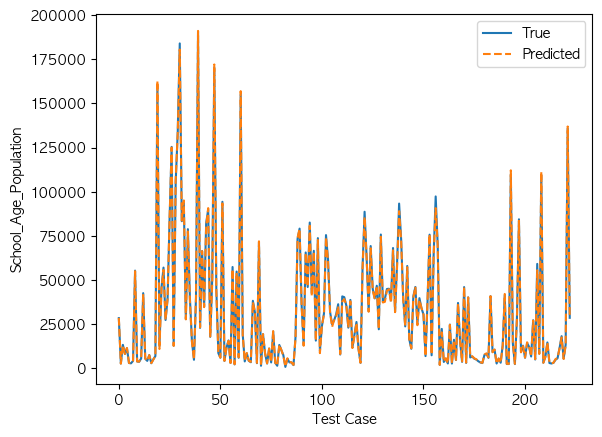

Mean Squared Error: 944585.79
Mean Absolute Percentage Error (MAPE): 2.56%


In [29]:
# 예측
predicted_data = best_model.predict(predict_X)

# 예측 결과 역전환
#predicted_data = scaler.inverse_transform(predicted_data)
predicted_data = invTransform(scaler, predicted_data, '학령인구(명)', use_cols).reshape(-1, 1)
predicted_data = predicted_data.round()
#y_true = scaler.inverse_transform(y_test.reshape(-1, 1))
y_true = invTransform(scaler, predict_y, '학령인구(명)', use_cols).reshape(-1, 1)

# 결과 시각화
plt.plot(range(len(y_true)), y_true, label='True')
plt.plot(range(len(predicted_data)), predicted_data, label='Predicted', linestyle='--')
plt.xlabel('Test Case')
plt.ylabel('School_Age_Population')
plt.legend()
plt.show()

# 모델 평가
mse = mean_squared_error(y_true, predicted_data)
print(f'Mean Squared Error: {mse:.2f}')

# MAPE 계산 함수
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# MAPE 계산
mape = calculate_mape(y_true, predicted_data)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

In [30]:
prediction = df[df['연도'].isin([i for i in range(2020, 2060)])]

In [31]:
prediction

행정구역(시도) 행정구역(시군구)    연도   총인구수(명)     유치원 수    초등학교 수      출생건수  \
10     강원특별자치도       강릉시  2020  0.028123  0.043632  0.078652  0.002654   
11     강원특별자치도       강릉시  2021  0.028074  0.043632  0.078652  0.002492   
12     강원특별자치도       강릉시  2022  0.027858  0.043632  0.080899  0.002495   
13     강원특별자치도       강릉시  2023  0.027734  0.044811  0.083146  0.002349   
14     강원특별자치도       강릉시  2024  0.027559  0.043632  0.085393  0.002235   
...        ...       ...   ...       ...       ...       ...       ...   
11811     충청북도       충주시  2055  0.023124  0.038915  0.044944  0.000358   
11812     충청북도       충주시  2056  0.023004  0.038915  0.044944  0.000335   
11813     충청북도       충주시  2057  0.022885  0.037736  0.044944  0.000318   
11814     충청북도       충주시  2058  0.022766  0.037736  0.042697  0.000299   
11815     충청북도       충주시  2059  0.022648  0.037736  0.042697  0.000282   

           사망건수          혼인건수      이혼건수   학령인구(명)         행정구역  
10     0.000015  7.569160e-10  0.072199  0.060407  강원특별자치도 강릉시  
11     0.000015  7.550260e-10  0.073069  0.058186  강원특별자치도 강릉시  
12     0.000018  6.529699e-10  0.070459  0.055464  강원특별자치도 강릉시  
13     0.000018  6.463552e-10  0.070285  0.053110  강원특별자치도 강릉시  
14     0.000019  5.811527e-10  0.068720  0.050876  강원특별자치도 강릉시  
...         ...           ...       ...       ...          ...  
11811  0.003449  2.579751e-10  0.046451  0.018498     충청북도 충주시  
11812  0.004042  2.494704e-10  0.045755  0.017887     충청북도 충주시  
11813  0.004736  2.419107e-10  0.045059  0.017297     충청북도 충주시  
11814  0.005550  2.343510e-10  0.044363  0.016727     충청북도 충주시  
11815  0.006503  2.277363e-10  0.043841  0.016174     충청북도 충주시  

[8920 rows x 12 columns]

In [41]:
# 시퀀스 데이터 생성
def create_sequence_data1(data, sequence_length):
    sequences = []
    regions = []
    year = []
    for region in data['행정구역'].unique().tolist():
        temp_df = data[data['행정구역'] == region]
        if len(temp_df) < sequence_length:
            continue

        year.extend([i for i in range(2023, 2060+1)])
        temp_df = temp_df[use_cols]
        for i in range(len(temp_df) - sequence_length+1):
            regions.append(region)
            seq = temp_df[i:i+sequence_length]
            sequences.append(seq)
    return np.array(sequences), np.array(regions), np.array(year)

In [42]:
X_sequences, r, y = create_sequence_data1(prediction, sequence_length)

In [43]:
X_sequences

array([[[2.81230247e-02, 4.36320755e-02, 7.86516854e-02, ...,
         7.56915958e-10, 7.21990257e-02, 6.04066962e-02],
        [2.80743916e-02, 4.36320755e-02, 7.86516854e-02, ...,
         7.55026031e-10, 7.30688935e-02, 5.81862509e-02],
        [2.78580018e-02, 4.36320755e-02, 8.08988764e-02, ...,
         6.52969946e-10, 7.04592902e-02, 5.54640986e-02]],

       [[2.80743916e-02, 4.36320755e-02, 7.86516854e-02, ...,
         7.55026031e-10, 7.30688935e-02, 5.81862509e-02],
        [2.78580018e-02, 4.36320755e-02, 8.08988764e-02, ...,
         6.52969946e-10, 7.04592902e-02, 5.54640986e-02],
        [2.77335504e-02, 4.48113208e-02, 8.31460674e-02, ...,
         6.46355200e-10, 7.02853166e-02, 5.31103873e-02]],

       [[2.78580018e-02, 4.36320755e-02, 8.08988764e-02, ...,
         6.52969946e-10, 7.04592902e-02, 5.54640986e-02],
        [2.77335504e-02, 4.48113208e-02, 8.31460674e-02, ...,
         6.46355200e-10, 7.02853166e-02, 5.31103873e-02],
        [2.75592364e-02, 4.36320755e

In [44]:
r

array(['강원특별자치도 강릉시', '강원특별자치도 강릉시', '강원특별자치도 강릉시', ..., '충청북도 충주시',
       '충청북도 충주시', '충청북도 충주시'], dtype='<U12')

In [45]:
X_sequences[1]

array([[2.80743916e-02, 4.36320755e-02, 7.86516854e-02, 2.49194031e-03,
        1.46978532e-05, 7.55026031e-10, 7.30688935e-02, 5.81862509e-02],
       [2.78580018e-02, 4.36320755e-02, 8.08988764e-02, 2.49473396e-03,
        1.79897453e-05, 6.52969946e-10, 7.04592902e-02, 5.54640986e-02],
       [2.77335504e-02, 4.48113208e-02, 8.31460674e-02, 2.34946390e-03,
        1.81676854e-05, 6.46355200e-10, 7.02853166e-02, 5.31103873e-02]])

In [46]:
# 예측
predicted_data = model.predict(X_sequences)

265/265 [==============================] - 0s 887us/step


In [47]:
predicted_data = invTransform(scaler, predicted_data, '학령인구(명)', use_cols).reshape(-1, 1)


In [48]:
predicted_data.round()


array([[27836.],
       [26722.],
       [25607.],
       ...,
       [ 7605.],
       [ 7187.],
       [ 6790.]])

In [49]:
predicted_df = pd.DataFrame({'연도': y, '행정구역': r, '학령인구(명)': predicted_data.round().flatten()})

In [50]:
wonju_df = predicted_df[predicted_df['행정구역'] == '강원특별자치도 원주시']

In [51]:
wonju_df

연도         행정구역  학령인구(명)
304  2023  강원특별자치도 원주시  54425.0
305  2024  강원특별자치도 원주시  53116.0
306  2025  강원특별자치도 원주시  51572.0
307  2026  강원특별자치도 원주시  49981.0
308  2027  강원특별자치도 원주시  48440.0
309  2028  강원특별자치도 원주시  46919.0
310  2029  강원특별자치도 원주시  45485.0
311  2030  강원특별자치도 원주시  44064.0
312  2031  강원특별자치도 원주시  42720.0
313  2032  강원특별자치도 원주시  41383.0
314  2033  강원특별자치도 원주시  40106.0
315  2034  강원특별자치도 원주시  38883.0
316  2035  강원특별자치도 원주시  37744.0
317  2036  강원특별자치도 원주시  36625.0
318  2037  강원특별자치도 원주시  35592.0
319  2038  강원특별자치도 원주시  34573.0
320  2039  강원특별자치도 원주시  33649.0
321  2040  강원특별자치도 원주시  32728.0
322  2041  강원특별자치도 원주시  31954.0
323  2042  강원특별자치도 원주시  31157.0
324  2043  강원특별자치도 원주시  30453.0
325  2044  강원특별자치도 원주시  29707.0
326  2045  강원특별자치도 원주시  29048.0
327  2046  강원특별자치도 원주시  28350.0
328  2047  강원특별자치도 원주시  27721.0
329  2048  강원특별자치도 원주시  27105.0
330  2049  강원특별자치도 원주시  26567.0
331  2050  강원특별자치도 원주시  26026.0
332  2051  강원특별자치도 원주시  25539.0
333  2052  강원특별자치도 원주시  25036.0
334  2053  강원특별자치도 원주시  24575.0
335  2054  강원특별자치도 원주시  24138.0
336  2055  강원특별자치도 원주시  23690.0
337  2056  강원특별자치도 원주시  23234.0
338  2057  강원특별자치도 원주시  22803.0
339  2058  강원특별자치도 원주시  22361.0
340  2059  강원특별자치도 원주시  21970.0
341  2060  강원특별자치도 원주시  21551.0

In [58]:
predicted_df['시도'] = predicted_df['행정구역'].apply(lambda x: x.split()[0])

In [60]:
predicted_df['시도'].unique()

array(['강원특별자치도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [54]:
use_region = ['강원특별자치도 원주시', '강원특별자치도 춘천시', '강원특별자치도 강릉시', '경기도 광주시']

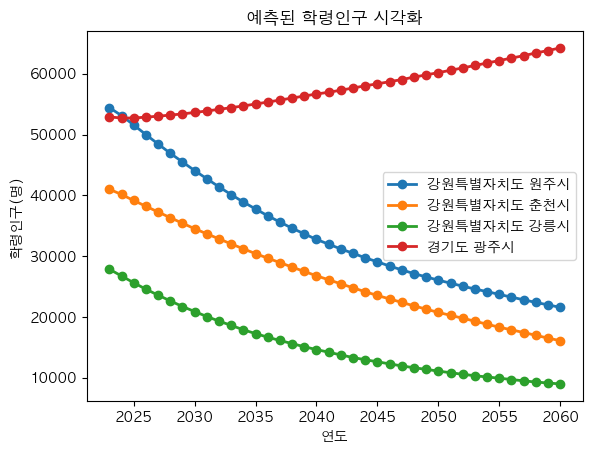

In [55]:
import matplotlib.pyplot as plt

# Iterate through each region
for region in use_region:
    temp_df = predicted_df[predicted_df['행정구역'] == region]
    plt.plot(temp_df['연도'], temp_df['학령인구(명)'], label=region, marker='o', linestyle='-', linewidth=2)

# Add labels and title
plt.xlabel('연도')
plt.ylabel('학령인구(명)')
plt.title('예측된 학령인구 시각화')

# Add legend
plt.legend()

# Display the plot
plt.show()


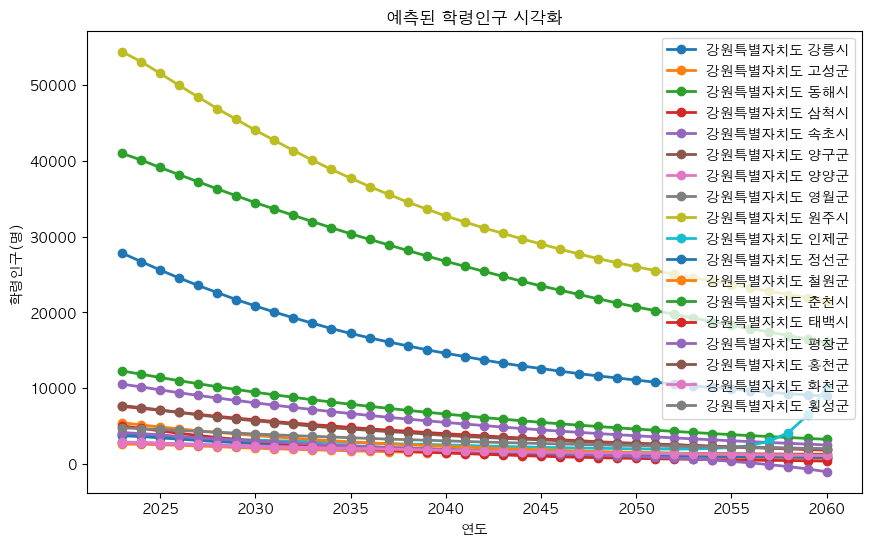

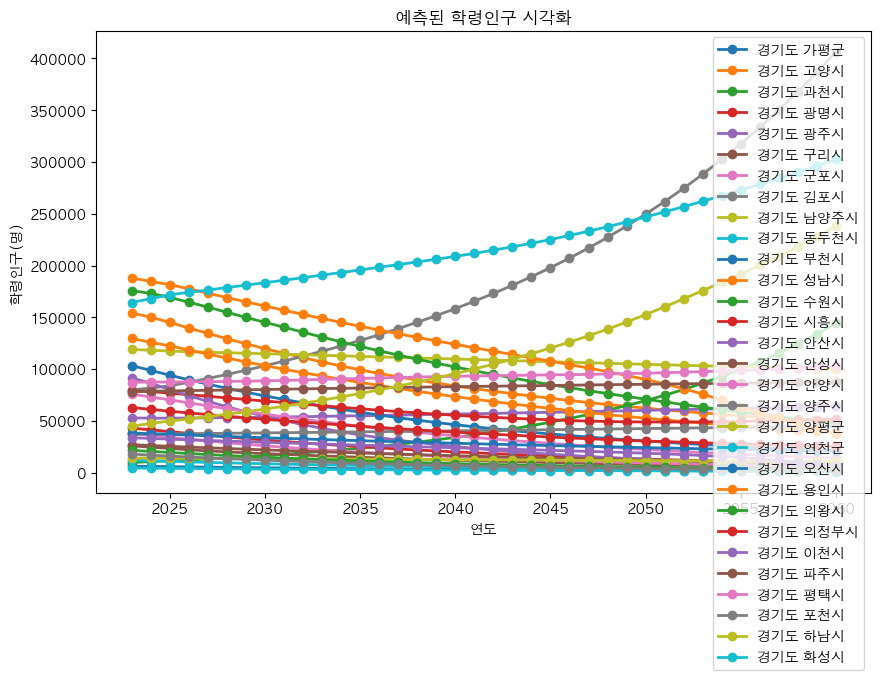

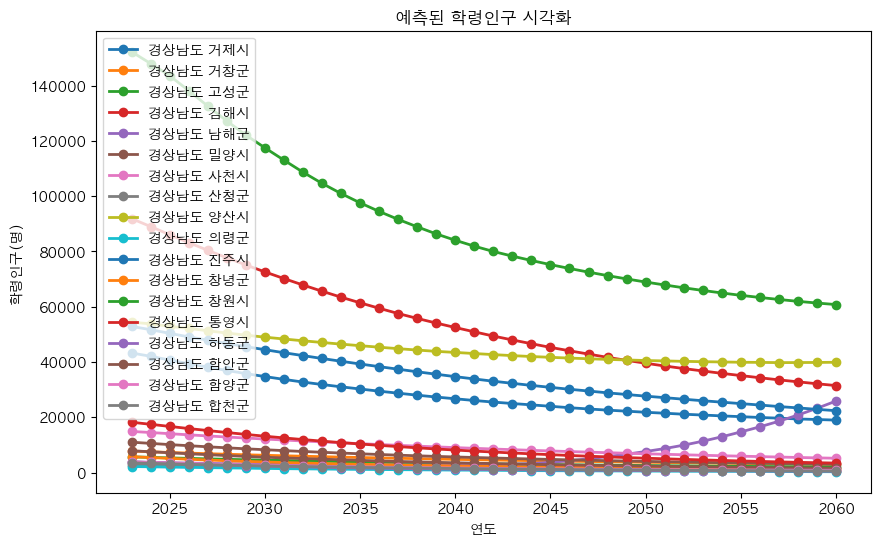

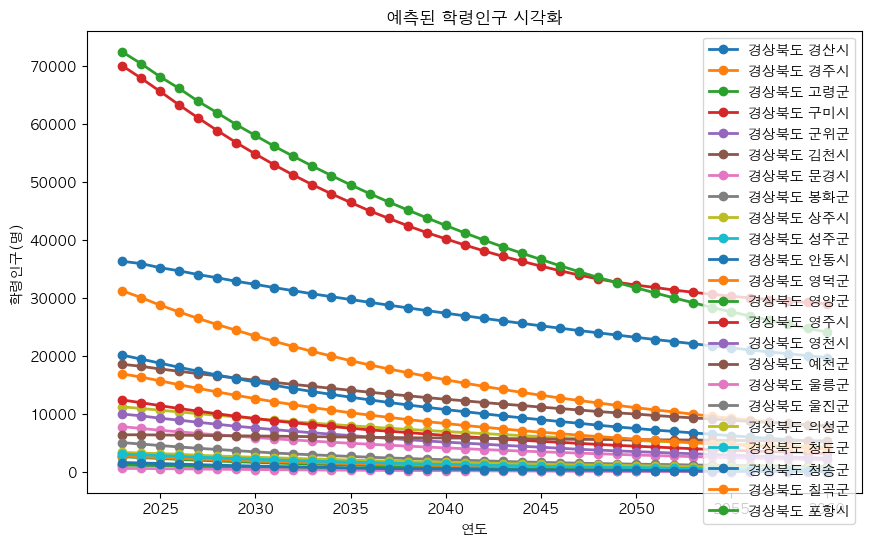

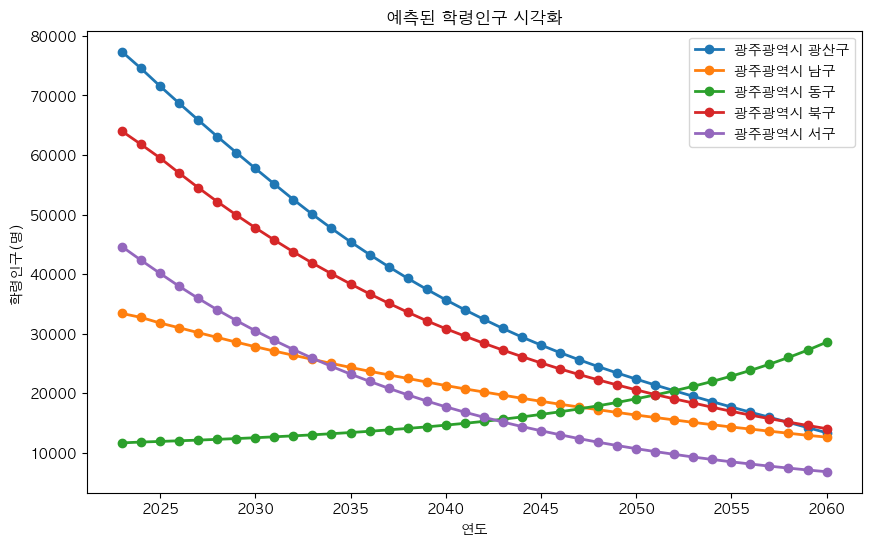

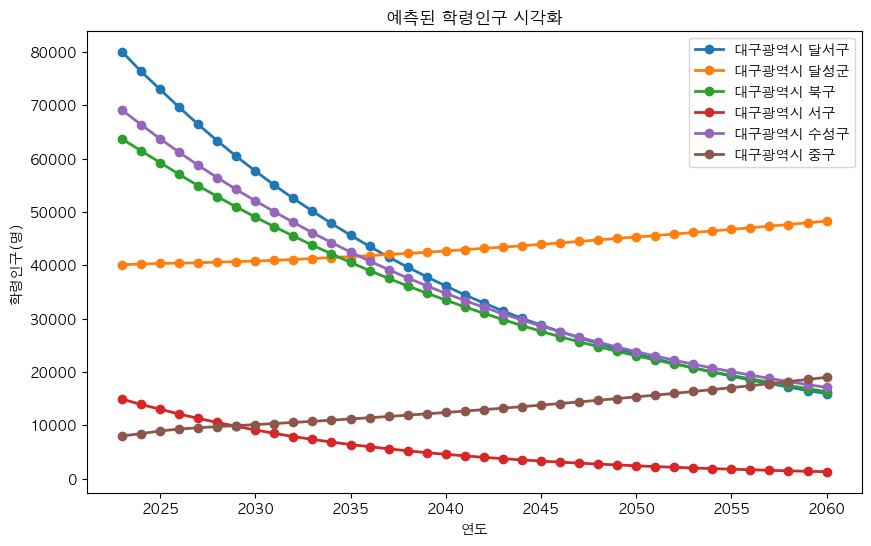

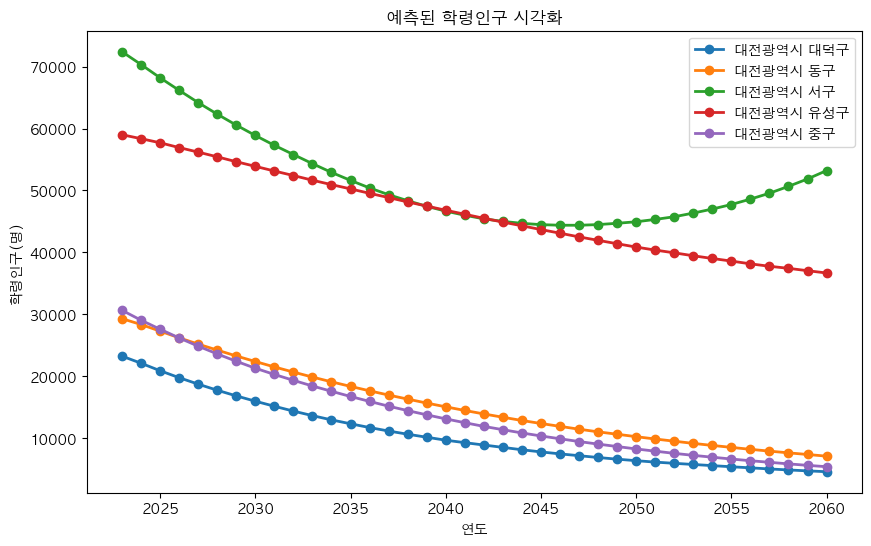

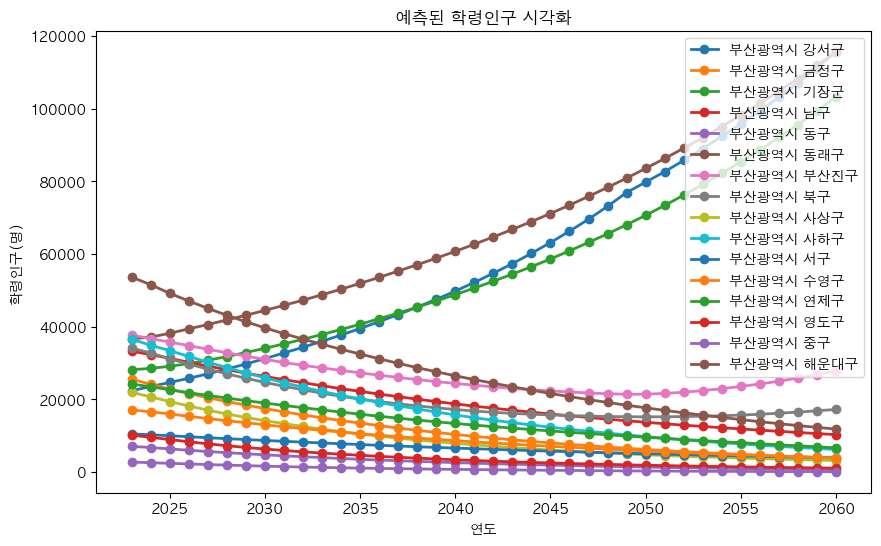

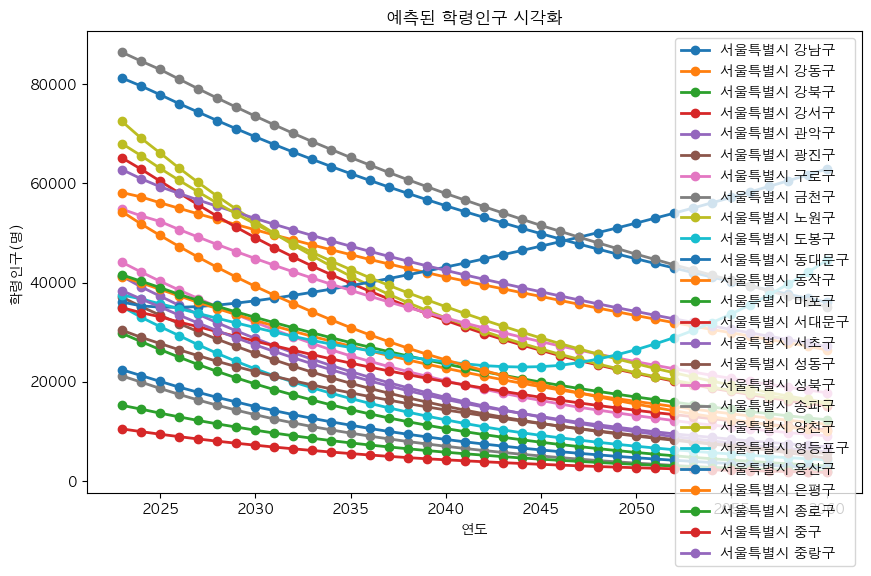

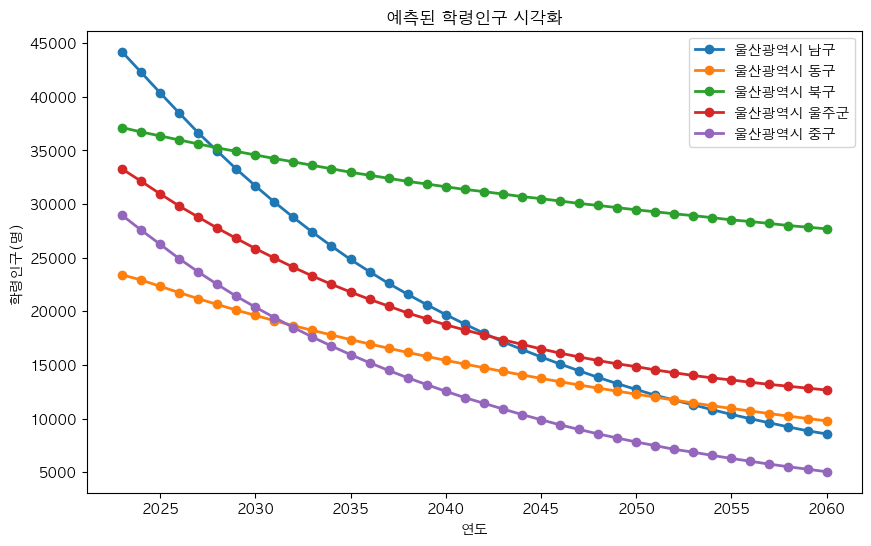

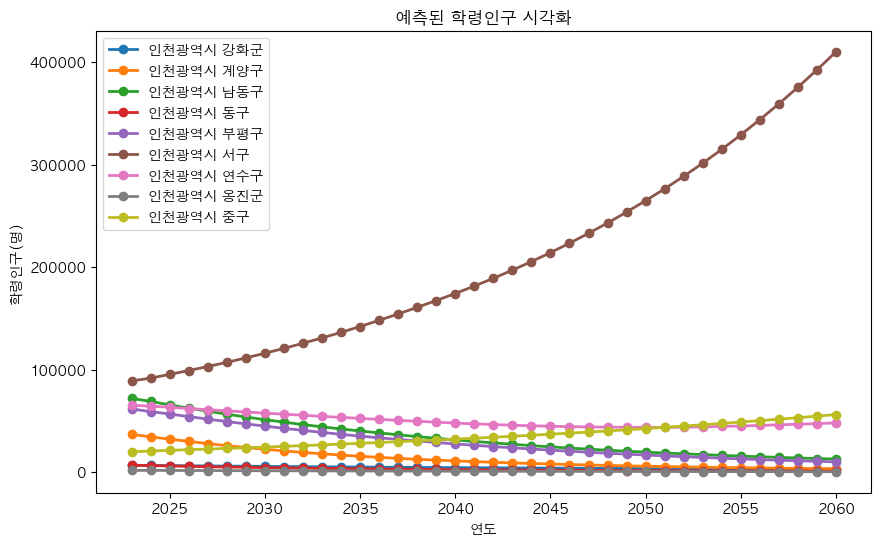

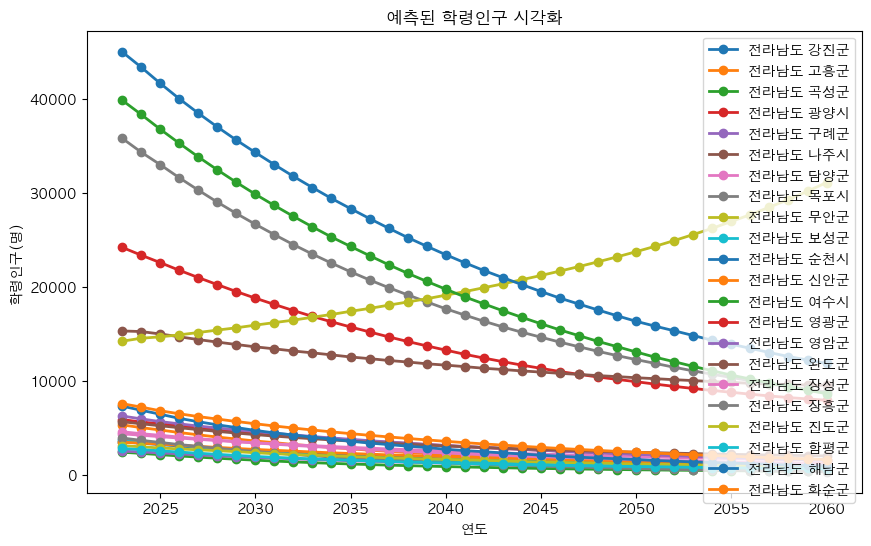

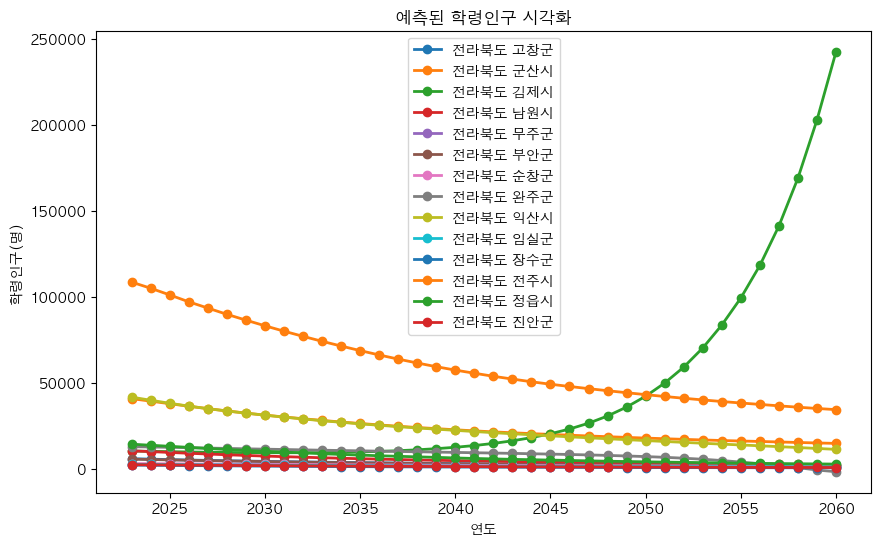

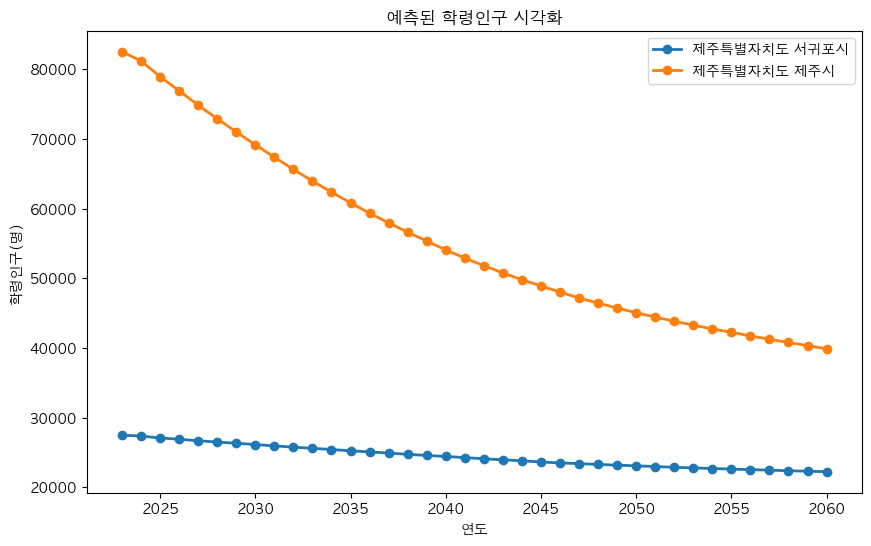

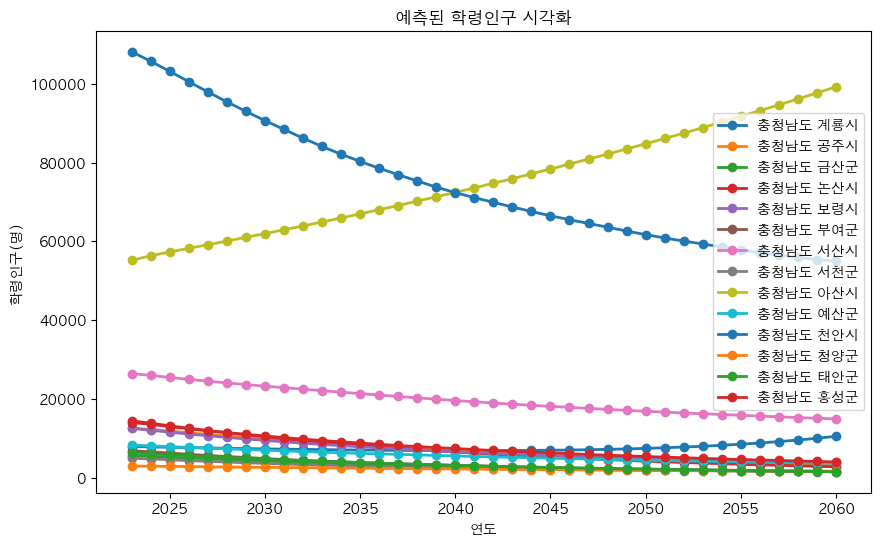

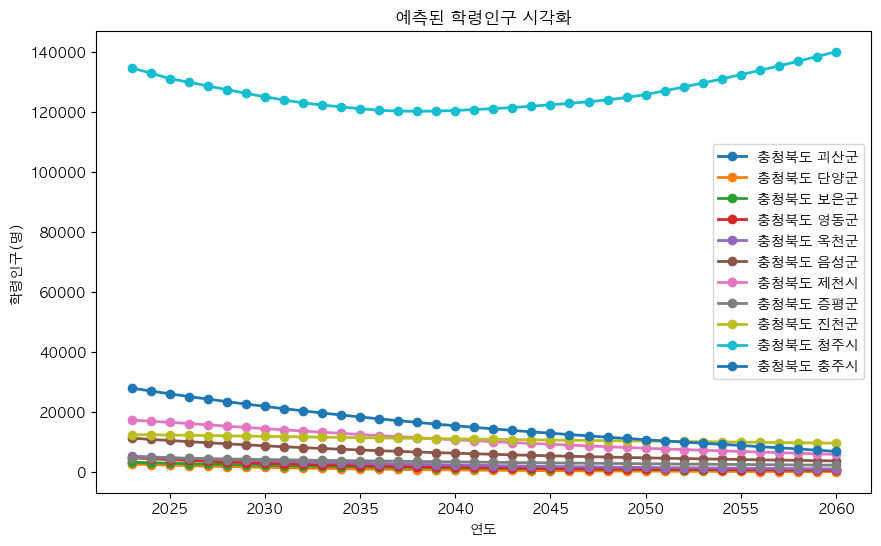

In [61]:
import matplotlib.pyplot as plt


for sido in predicted_df['시도'].unique().tolist():
    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Iterate through each region
    for region in predicted_df[predicted_df['시도'] == sido]['행정구역'].unique().tolist():
        temp_df = predicted_df[predicted_df['행정구역'] == region]
        plt.plot(temp_df['연도'], temp_df['학령인구(명)'], label=region, marker='o', linestyle='-', linewidth=2)

    # Add labels and title
    plt.xlabel('연도')
    plt.ylabel('학령인구(명)')
    plt.title('예측된 학령인구 시각화')

    # Add legend
    plt.legend()

    # Display the plot
    plt.show()


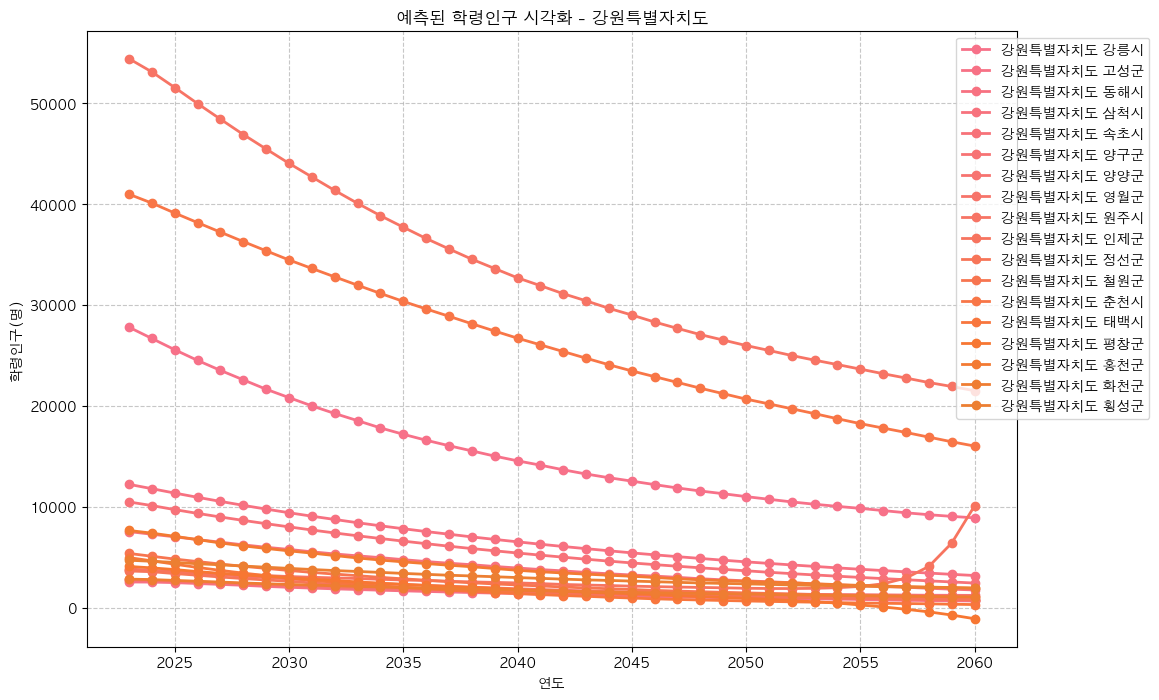

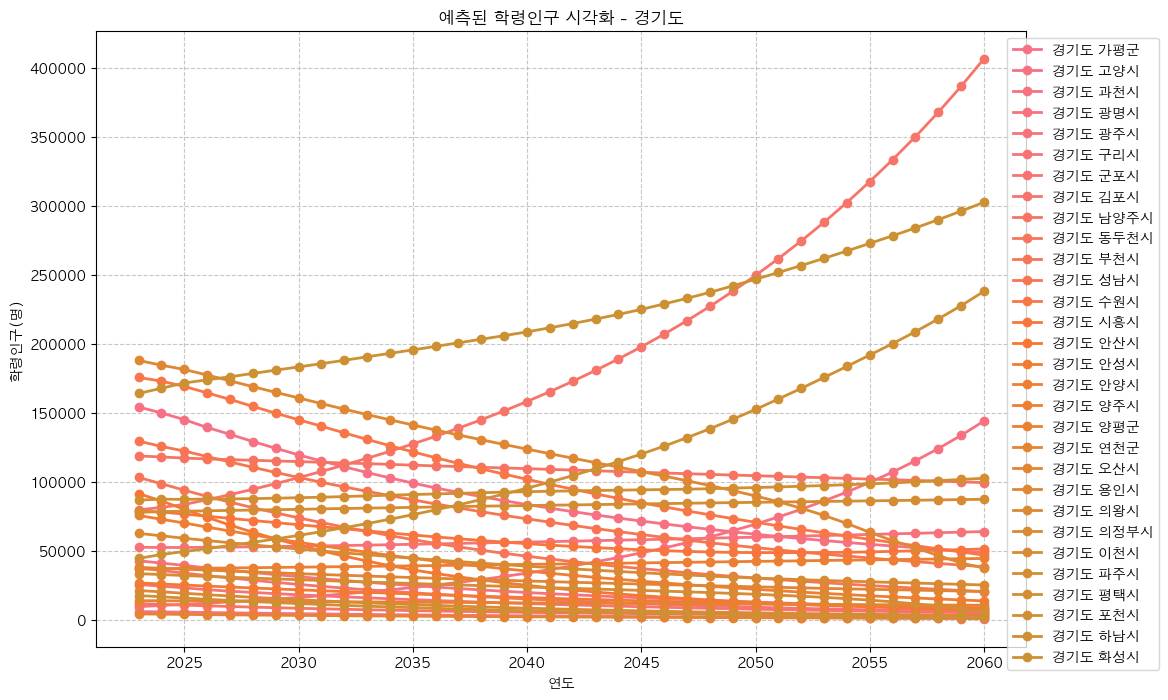

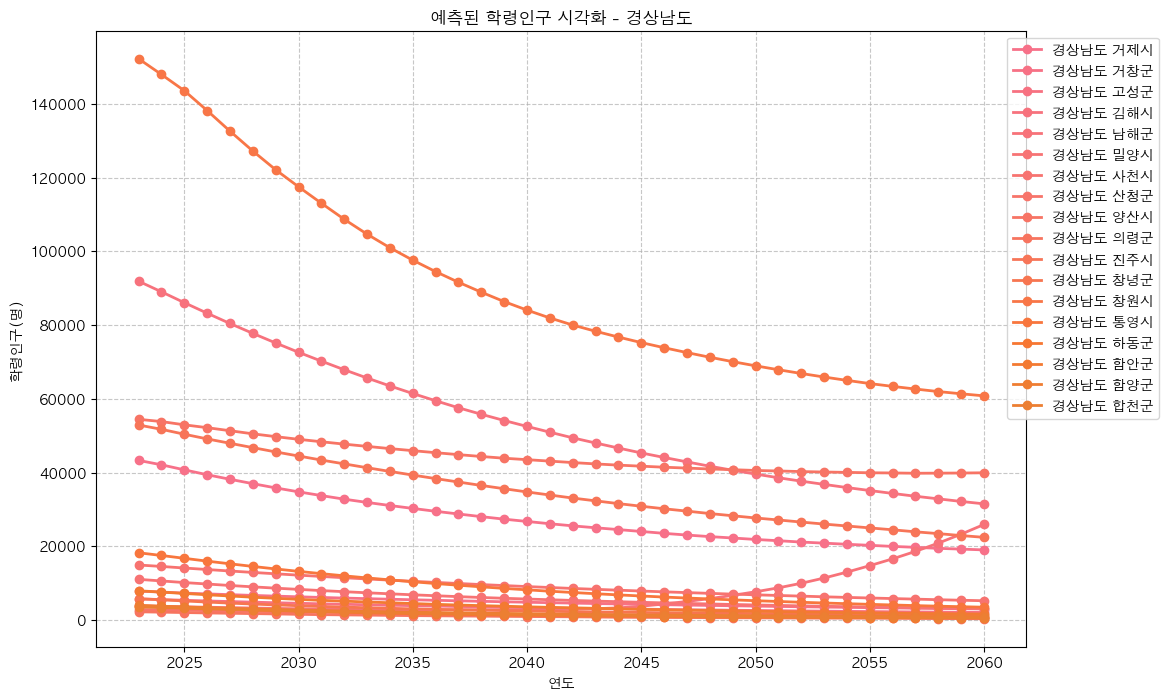

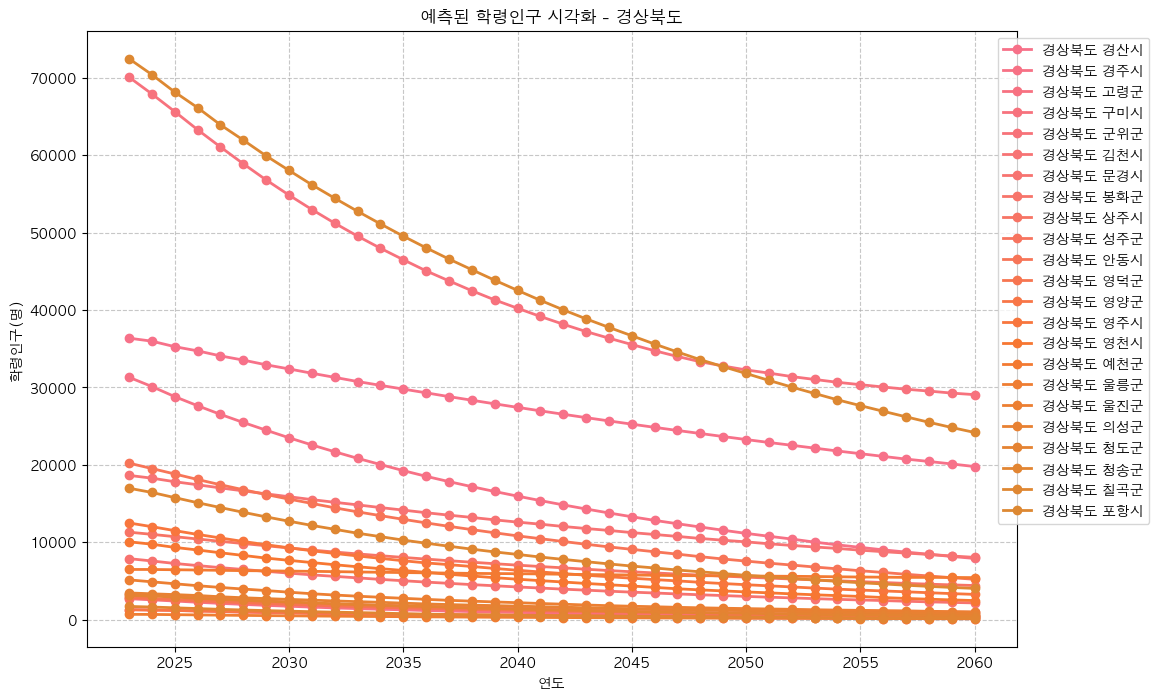

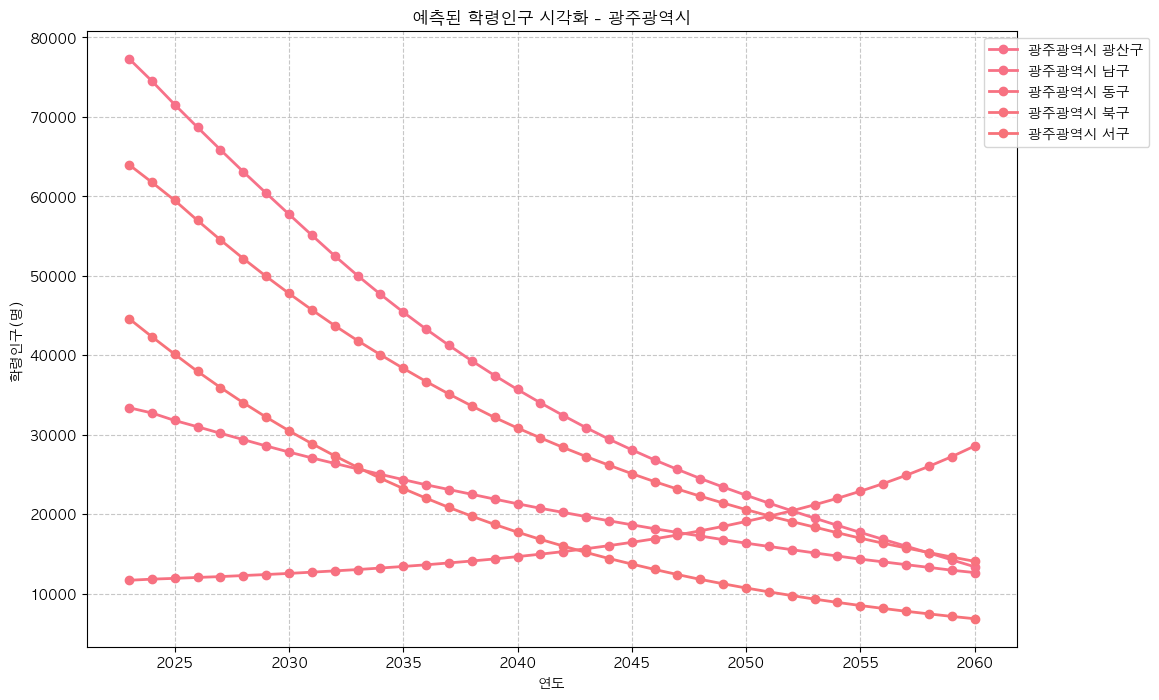

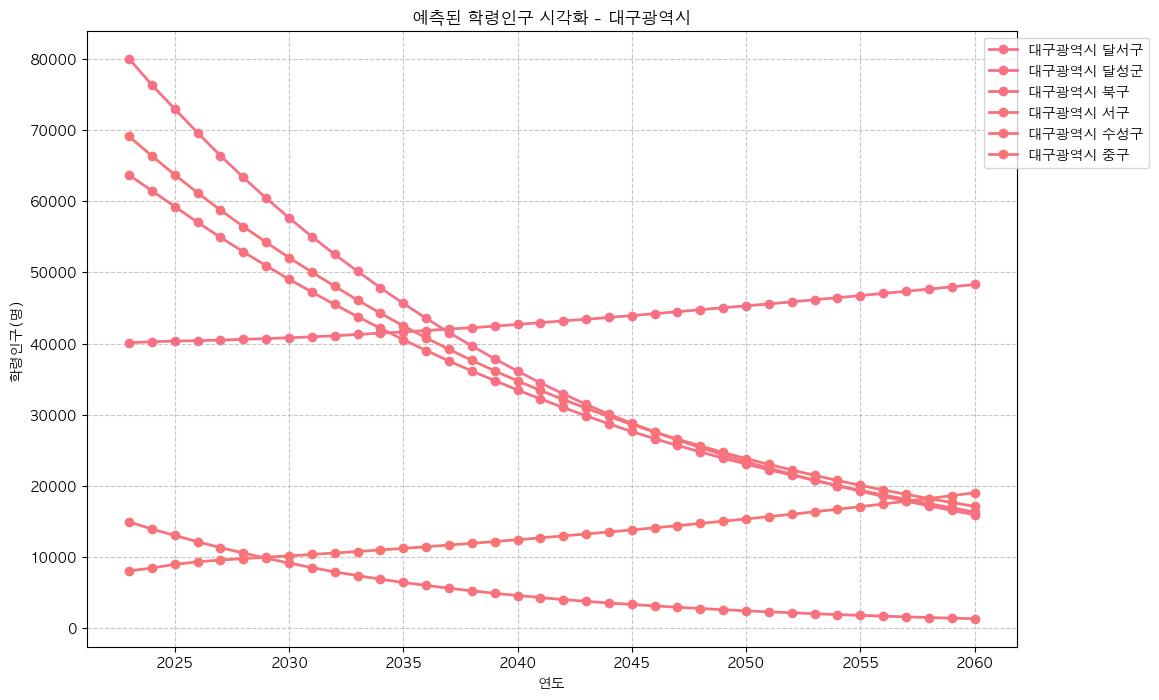

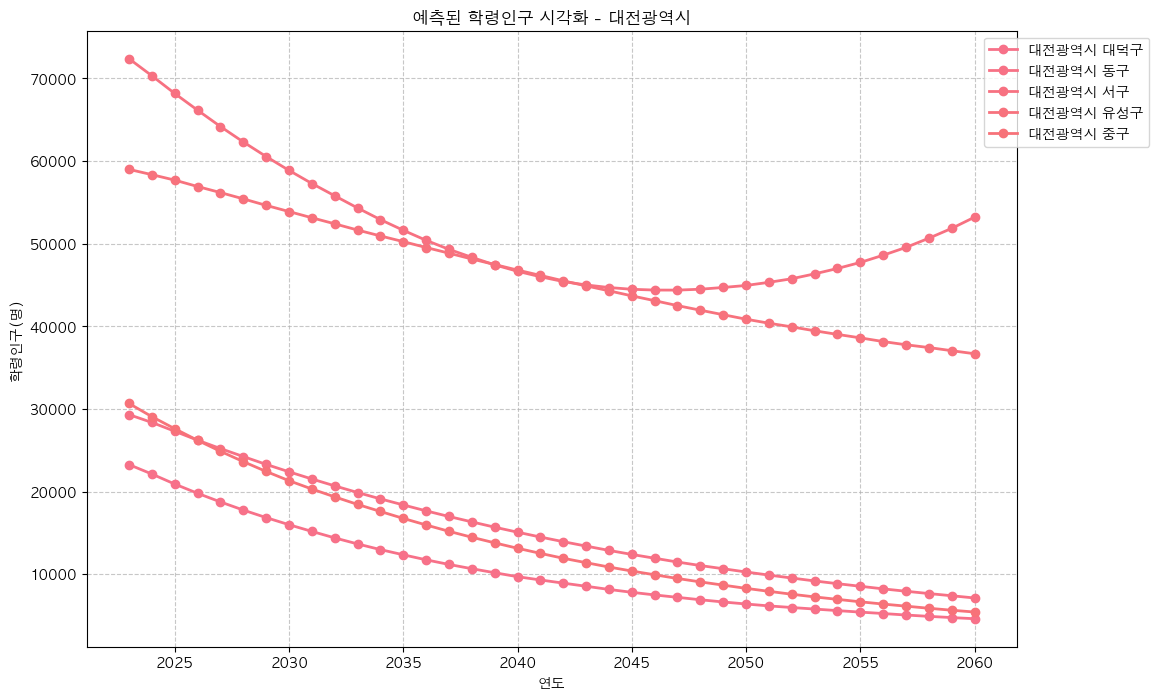

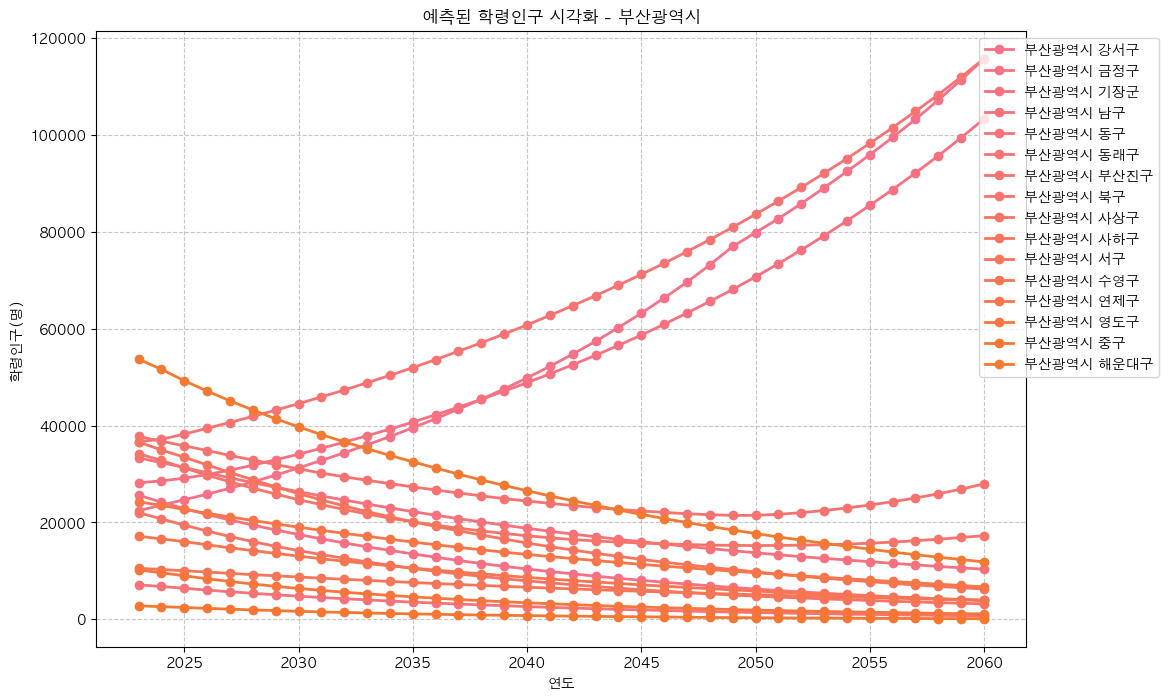

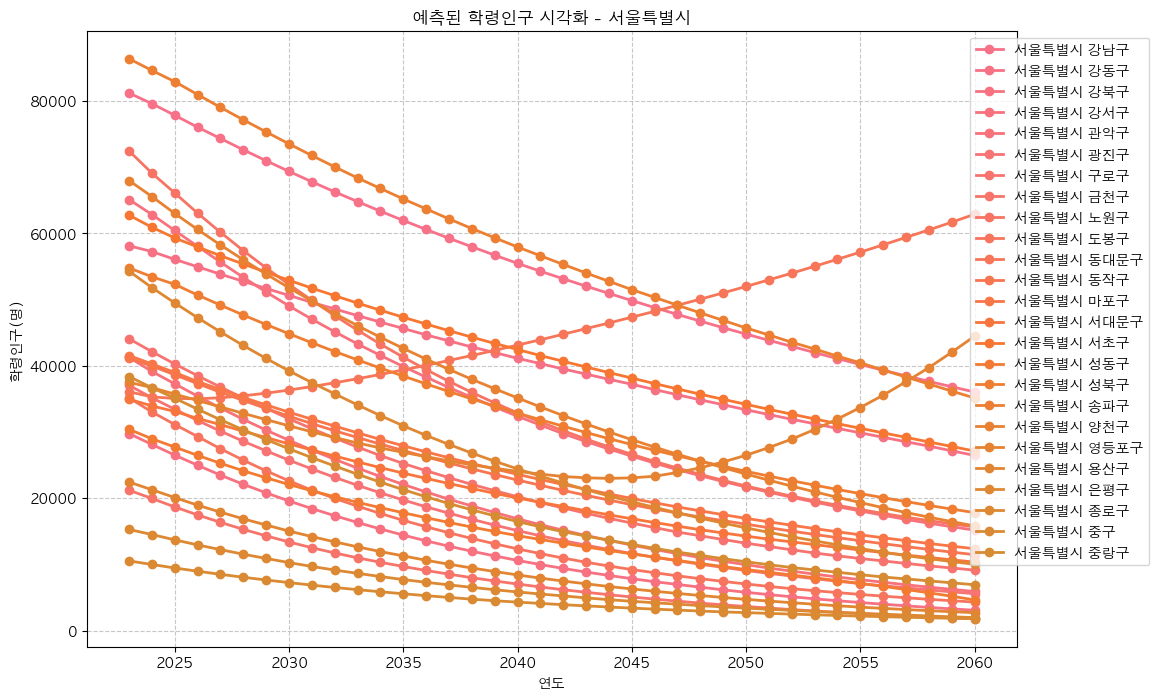

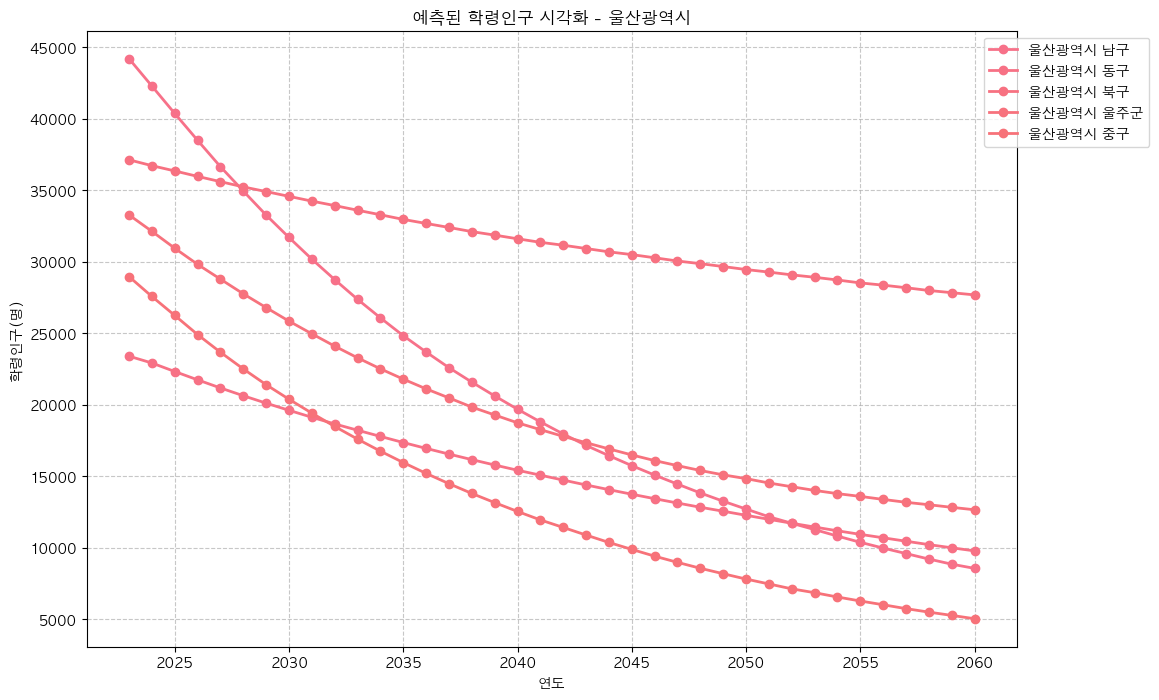

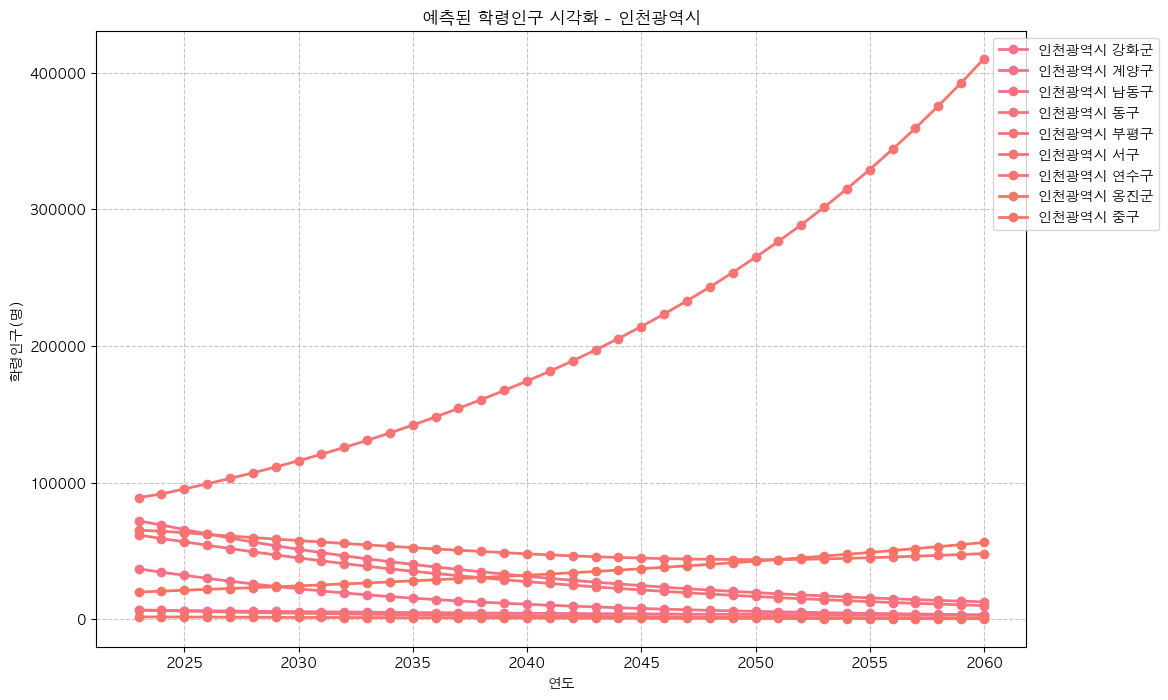

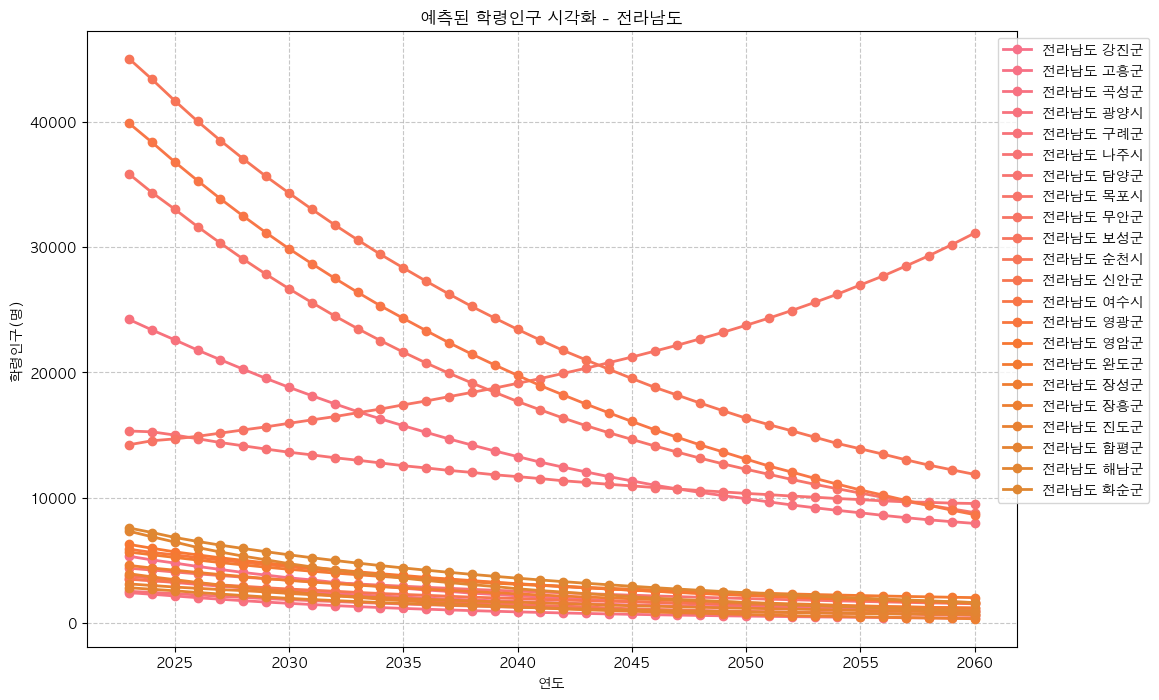

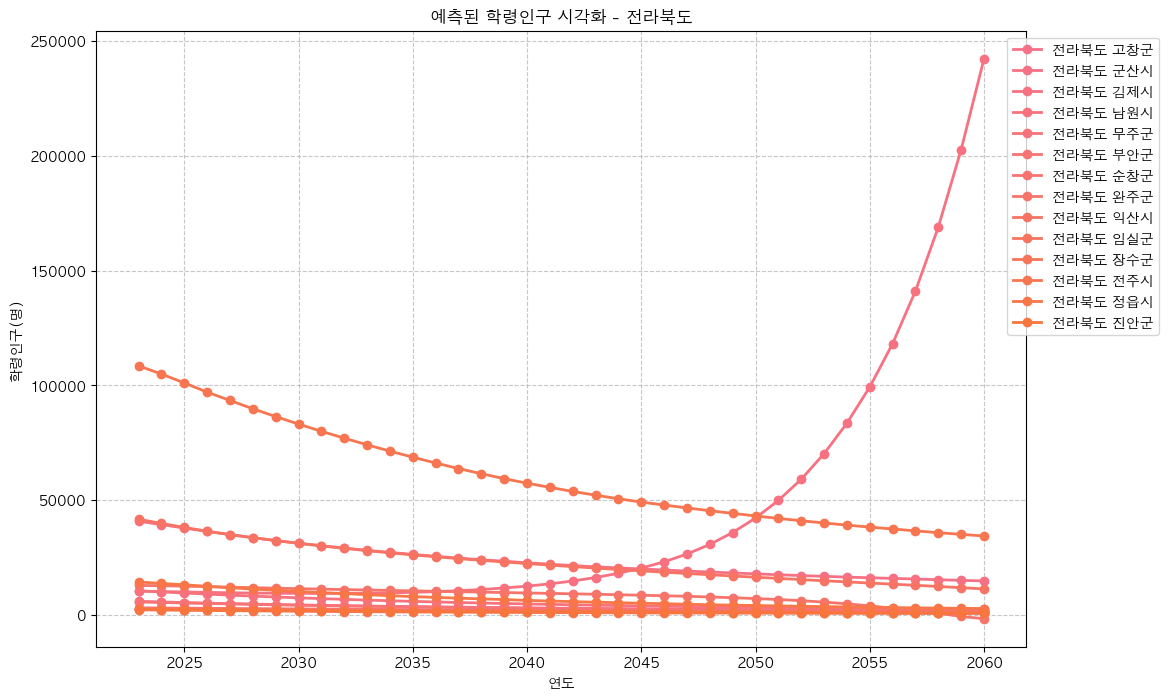

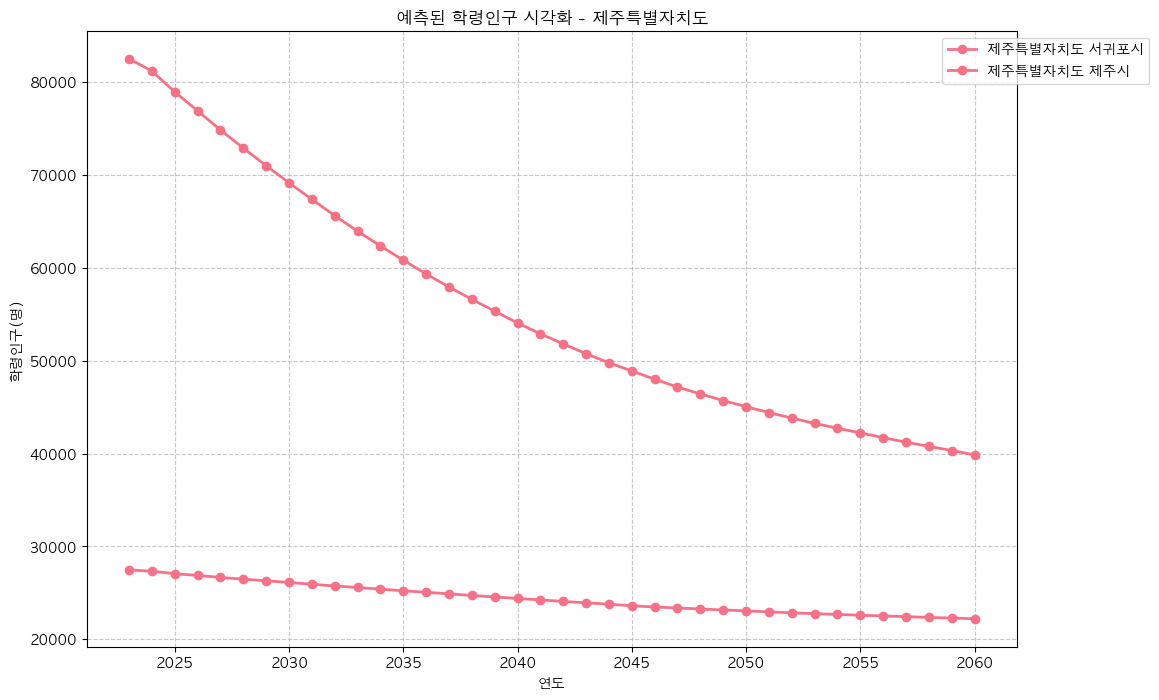

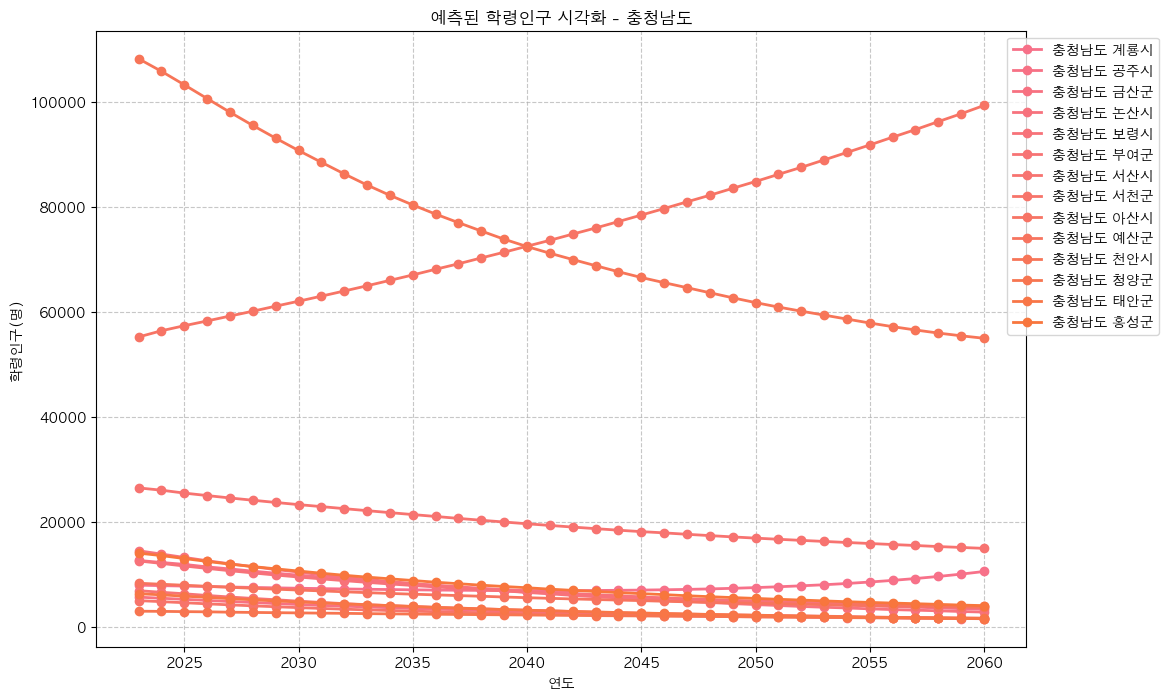

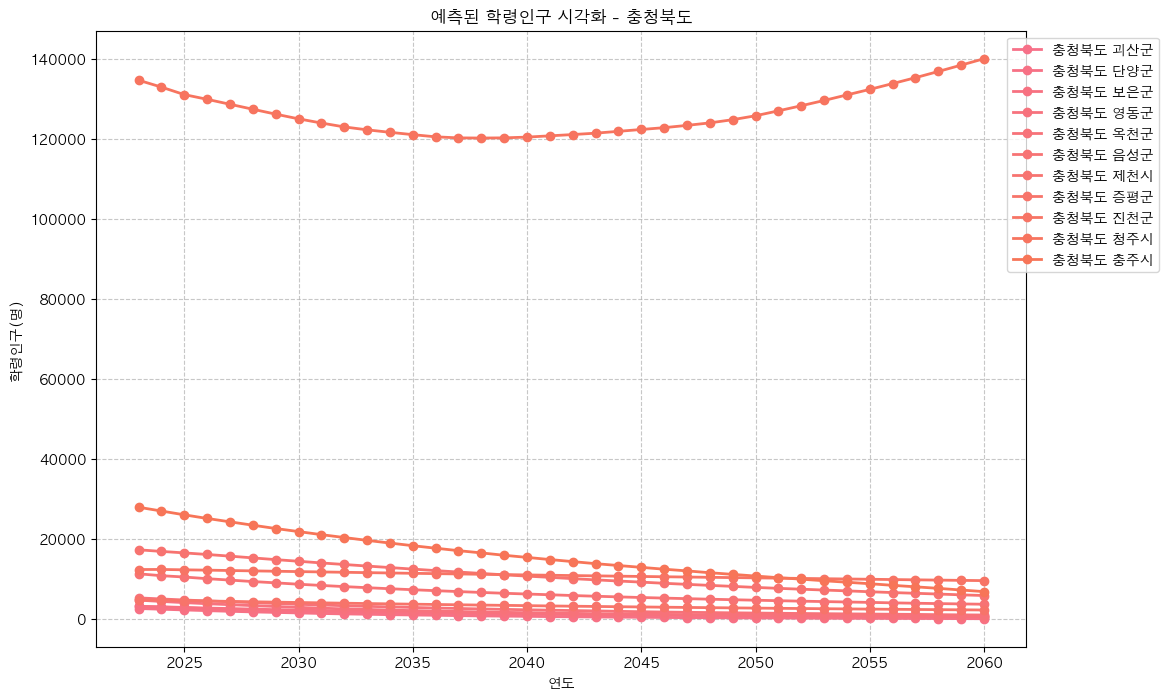

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for a better color palette


for sido in predicted_df['시도'].unique().tolist():
    # Create a new figure
    plt.figure(figsize=(12, 8))

    # Iterate through each region
    for i, region in enumerate(predicted_df[predicted_df['시도'] == sido]['행정구역'].unique().tolist()):
        temp_df = predicted_df[predicted_df['행정구역'] == region]
        plt.plot(temp_df['연도'], temp_df['학령인구(명)'], label=region, marker='o', linestyle='-', linewidth=2)

    # Add labels and title
    plt.xlabel('연도')
    plt.ylabel('학령인구(명)')
    plt.title(f'예측된 학령인구 시각화 - {sido}')

    # Add legend with adjusted placement
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

    # Add grid lines
    plt.grid(True, linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()
